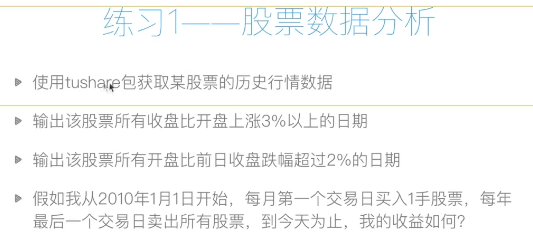

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import baostock as bs

/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
Duplicate key in file PosixPath('/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'), line 400 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')
/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


使用BaoStock包获取某股票的历史行情数据

In [2]:
#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

rs = bs.query_history_k_data("600519.SH", "date,code,open,high,low,close",start_date='1988-01-01')
print('query_history_k_data respond error_code:'+rs.error_code)
print('query_history_k_data respond  error_msg:'+rs.error_msg)

#### 打印结果集 ####
data_list = []
while (rs.error_code == '0') & rs.next():  # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)
result

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data respond error_code:0
query_history_k_data respond  error_msg:success


,date,code,open,high,low,close
0,2001-08-27,sh.600519,34.5100,37.7800,32.8500,35.5500
1,2001-08-28,sh.600519,34.9900,37.0000,34.6100,36.8600
2,2001-08-29,sh.600519,36.9800,37.0000,36.1000,36.3800
3,2001-08-30,sh.600519,36.2800,37.5100,36.0000,37.1000
4,2001-08-31,sh.600519,37.1500,37.6200,36.8000,37.0100
...,...,...,...,...,...,...
4843,2021-08-11,sh.600519,1780.0100,1785.0100,1750.0100,1750.5000
4844,2021-08-12,sh.600519,1732.0000,1749.0000,1686.1900,1690.0000
4845,2021-08-13,sh.600519,1690.0000,1713.0000,1679.0000,1700.0400
4846,2021-08-16,sh.600519,1696.0000,1713.6000,1685.0800,1699.2000


In [3]:
#### 结果集输出到csv文件 ####   
result.to_csv("600519.csv", index=False)
#### 登出系统 ####
bs.logout()

logout success!


In [5]:
df = pd.read_csv("600519.csv", index_col = 'date', parse_dates=['date'])[['open', 'close', 'high', 'low']]
df

,open,close,high,low
date,,,,
2001-08-27,34.51,35.55,37.78,32.85
2001-08-28,34.99,36.86,37.00,34.61
2001-08-29,36.98,36.38,37.00,36.10
2001-08-30,36.28,37.10,37.51,36.00
2001-08-31,37.15,37.01,37.62,36.80
...,...,...,...,...
2021-08-11,1780.01,1750.50,1785.01,1750.01
2021-08-12,1732.00,1690.00,1749.00,1686.19
2021-08-13,1690.00,1700.04,1713.00,1679.00


输出该股票所有收盘比开盘上涨3%以上的日期

In [6]:
df[(df['close'] - df['open']) / df['open'] >= 0.03]

,open,close,high,low
date,,,,
2001-08-27,34.51,35.55,37.78,32.85
2001-08-28,34.99,36.86,37.00,34.61
2001-09-10,35.40,36.70,36.85,35.01
2001-12-21,34.70,35.87,35.97,34.70
2002-01-18,34.80,36.65,36.88,34.70
...,...,...,...,...
2021-05-11,1876.00,1959.00,1966.00,1873.30
2021-05-25,2085.00,2194.50,2200.10,2085.00
2021-07-28,1703.00,1768.90,1788.20,1682.12


输出该股票所有开盘比前日收盘跌幅超过2%的日期

`shift`函数

In [7]:
df.shift(1) # 数据向下移动 错开n位

,open,close,high,low
date,,,,
2001-08-27,NaN,NaN,NaN,NaN
2001-08-28,34.51,35.55,37.78,32.85
2001-08-29,34.99,36.86,37.00,34.61
2001-08-30,36.98,36.38,37.00,36.10
2001-08-31,36.28,37.10,37.51,36.00
...,...,...,...,...
2021-08-11,1700.00,1799.00,1802.88,1675.00
2021-08-12,1780.01,1750.50,1785.01,1750.01
2021-08-13,1732.00,1690.00,1749.00,1686.19


In [10]:
df

,open,close,high,low
date,,,,
2001-08-27,34.51,35.55,37.78,32.85
2001-08-28,34.99,36.86,37.00,34.61
2001-08-29,36.98,36.38,37.00,36.10
2001-08-30,36.28,37.10,37.51,36.00
2001-08-31,37.15,37.01,37.62,36.80
...,...,...,...,...
2021-08-11,1780.01,1750.50,1785.01,1750.01
2021-08-12,1732.00,1690.00,1749.00,1686.19
2021-08-13,1690.00,1700.04,1713.00,1679.00


In [12]:
df[(df['open'] - df['close'].shift(1)) / df['close'] <= 0.02]

,open,close,high,low
date,,,,
2001-08-28,34.99,36.86,37.00,34.61
2001-08-29,36.98,36.38,37.00,36.10
2001-08-30,36.28,37.10,37.51,36.00
2001-08-31,37.15,37.01,37.62,36.80
2001-09-03,37.20,36.99,37.57,36.85
...,...,...,...,...
2021-08-11,1780.01,1750.50,1785.01,1750.01
2021-08-12,1732.00,1690.00,1749.00,1686.19
2021-08-13,1690.00,1700.04,1713.00,1679.00


假如我从2010年1月1日开始，每月第一个交易日买入1手股票，每年最后一个交易日卖出所有股票，到今天为止，我的收益如何？

In [25]:
price_last = df['open'][-1]
df = df['2001-09':'2021-08']
df_monthly = df.resample("MS").first()
df_monthly

,open,close,high,low
date,,,,
2001-09-01,37.20,36.99,37.57,36.85
2001-10-01,37.00,36.58,37.18,36.25
2001-11-01,35.05,35.57,35.64,34.95
2001-12-01,35.35,36.17,36.27,35.34
2002-01-01,38.72,37.55,38.80,37.45
...,...,...,...,...
2021-04-01,2021.00,2044.50,2046.80,2001.22
2021-05-01,2000.00,1959.00,2006.84,1953.00
2021-06-01,2222.00,2240.95,2248.95,2206.00


In [23]:
df_yearly = df.resample("A").last()[:-1]
df_yearly

,open,close,high,low
date,,,,
2001-12-31,37.67,38.55,39.30,37.46
2002-12-31,25.60,25.46,25.78,25.45
2003-12-31,25.50,25.40,25.50,25.23
2004-12-31,36.70,36.64,37.70,36.08
2005-12-31,46.50,45.62,46.52,44.90
2006-12-31,85.49,87.83,92.10,84.56
2007-12-31,221.60,230.00,230.10,217.77
2008-12-31,108.20,108.70,109.49,107.50
2009-12-31,169.23,169.82,170.05,168.80


In [33]:
cost_money = 0 # 花了多少钱
hold = 0 # 
for year in range(2001, 2022):
    
    cost_money += df_monthly[str(year)]['open'].sum()*100
    hold += len(df_monthly[str(year)]['open']) * 100
    if year != 2021:
        cost_money -= df_yearly[str(year)]['open'][0] * hold
        hold = 0
    print(cost_money)

cost_money -= hold * price_last

print(-cost_money)
        
# df_monthly['2001']

-608.0
8879.999999999993
7621.0
2234.0
2676.9999999999927
-33606.0
-148279.0
-84309.0
-125183.0
-154710.0
-152702.00000000006
-143297.00000000006
-88369.00000000006
-129435.00000000006
-136623.0000000001
-203823.0000000001
-515026.0000000001
-364640.00000000023
-652316.0000000002
-1286317.0000000005
341277.99999999953
1018722.0000000005
